# Packages used

In [ ]:
import numpy as np
import pandas as pd
import shutil
import os, sys
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [ ]:
import tensorflow as tf
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import cv2
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator, array_to_img
from tensorflow.image import resize

# Functions define

In [ ]:
# 把圖片轉成陣列
def imgtoarray(f, size):
  img = load_img(f, color_mode = "grayscale")

  array = tf.keras.preprocessing.image.img_to_array(img)
  array = resize(array, [size, size], method='nearest')
  array = array/255.0
  arr = array.numpy().ravel()
  
  return arr

In [ ]:
# 處理各個資料夾的圖片檔案
def imgpreprocessing(foldername, labels, size):

  data = []
  for l in labels:
    #folder = dir + foldername + '/' +l + '/'
    folder = '/content/drive/MyDrive/DM/'+ foldername + '/' +l + '/'
    onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
    
    for i in range(len(onlyfiles)):
      f = folder + onlyfiles[i]
      a = imgtoarray(f, size)
      a = np.append(a, l[0])
      data.append(a)

      if i%20 == 0:
        print(i, 'imgs are done.')
    print(l+' is done.')

  return data

In [ ]:
# 處理各個資料夾的圖片檔案(分類別版)
def imgpreprocessing2(label, size):

  data = []

  folder = '/content/drive/MyDrive/DM/train_DG_more/' + label +'/'
  onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

  for i in range(len(onlyfiles)):
    f = folder + onlyfiles[i]
    a = imgtoarray(f, size)
    a = np.append(a, label[0])
    data.append(a)

    if i%20 == 0:
      print(i, 'imgs are done.')
  print(label+' is done.')

  return data

In [ ]:
# Data Augmentation (單張 image) 
def imagegenerate(f):
  img = load_img(f)
  plt.imshow(img)
  data = img_to_array(img)
  samples = np.expand_dims(data, 0)
  datagen = ImageDataGenerator(    
      rotation_range=5,
      width_shift_range=0.05,
      height_shift_range=0.05,
      zoom_range=0.05)
  
  datagen.fit(samples)

  it = datagen.flow(samples, batch_size=1)
  batch = it.next()
  image = batch[0].astype('uint8')
  img2 = array_to_img(image)
  
  return img2

In [ ]:
# 儲存產生的images
def DataAugmentation(label, quantity):
  folder = '/content/drive/MyDrive/DM/train/' + label +'/'
  folder_save = '/content/drive/MyDrive/DM/train_DG_more/' + label + '/'
  onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

  i = quantity
  while(i):
    j = np.random.randint(len(onlyfiles))
    f = folder + onlyfiles[j]
    img = imagegenerate(f)
    img.save(folder_save + 'DG' + str(quantity-i) +'.jpg', 'JPEG')
    i = i-1

# Main Code - Data preprocessing

查看原始資料，並定義資料路徑

In [ ]:
# files' path
dir = "/content/drive/Shareddrives/DataMining_2021/Term Project/Data/"
labels = ['Covid', 'Viral Pneumonia', 'Normal']

[111, 70, 70]


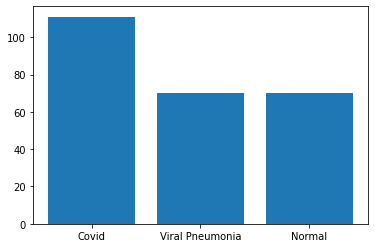

In [ ]:
# 檢查data個分類之平衡問題
train_C_num = len(os.listdir(dir + 'train/Covid'))
train_V_num = len(os.listdir(dir + 'train/Viral Pneumonia'))
train_N_num = len(os.listdir(dir + 'train/Normal'))

nums = [train_C_num, train_V_num, train_N_num]
print(nums)
plt.bar(labels, nums, )
plt.show()

將原始train, test 資料及之圖檔轉換為256*256的陣列

In [ ]:
# define column names as each pixel and label
col = []
for i in range(256*256):
  col.append('pixel'+str(i+1))
col.append('label')

In [ ]:
# train data generating
train = imgpreprocessing('train', labels, 256)
df_train = pd.DataFrame(train, columns = col)
df_train.to_csv('/content/drive/Shareddrives/DataMining_2021/Term Project/Data/train.csv', index=True)

In [ ]:
# test data generating
test = imgpreprocessing('test', labels, 256)
df_test = pd.DataFrame(test, columns = col)
df_test.to_csv('/content/drive/Shareddrives/DataMining_2021/Term Project/Data/test.csv', index=True)

處理train 內資料不平衡的問題，將各類別的資料生至統一111個圖檔（旋轉＋縮放），並將圖檔轉成256*256的陣列

In [ ]:
# train data with Data Augmentation generating (Rotation, shift, zoom)
DataAugmentation('Viral Pneumonia', 111-70)
DataAugmentation('Normal', 111-70)

In [ ]:
train_DG_ = imgpreprocessing('train_DG', 256)
df_train_DG = pd.DataFrame(train_DG, columns = col)
df_train_DG.to_csv('/content/drive/Shareddrives/DataMining_2021/Term Project/Data/train_DG.csv', index=True)

處理train 內資料不平衡的問題，將各類別的資料生至統一500個圖檔（旋轉＋縮放），並將圖檔轉成256*256的陣列

In [ ]:
# train data with Data Augmentation generating (Rotation, shift, zoom)
DataAugmentation('Covid', 500-111)
DataAugmentation('Viral Pneumonia', 500-70)
DataAugmentation('Normal', 500-70)

In [ ]:
# 因為ram不夠所以各類別先分開處理
train_DG_500_C = imgpreprocessing2('Covid', 256)
df_train_DG_500_C = pd.DataFrame(train_DG_500_C, columns = col)
df_train_DG_500_C.to_csv('/content/drive/MyDrive/DM/train_DG_500_C.csv', index=True)

train_DG_500_V = imgpreprocessing2('Viral Pneumonia', 256)
df_train_DG_500_V = pd.DataFrame(train_DG_500_V, columns = col)
df_train_DG_500_V.to_csv('/content/drive/MyDrive/DM/train_DG_500_V.csv', index=True)

train_DG_500_N = imgpreprocessing2('Normal', 256)
df_train_DG_500_N = pd.DataFrame(train_DG_500_N, columns = col)
df_train_DG_500_N.to_csv('/content/drive/MyDrive/DM/train_DG_500_N.csv', index=True)


In [ ]:
# 合併三個類別的資料
df_train_DG_500_C = pd.read_csv('/content/drive/MyDrive/DM/train_DG_500_C.csv')
df_train_DG_500_V = pd.read_csv('/content/drive/MyDrive/DM/train_DG_500_V.csv')
df_train_DG_500_N = pd.read_csv('/content/drive/MyDrive/DM/train_DG_500_N.csv')

df_train_DG_500_C = df_train_DG_500_C.drop(df_train_DG_500_C.columns[0], axis=1)
df_train_DG_500_V = df_train_DG_500_V.drop(df_train_DG_500_V.columns[0], axis=1)
df_train_DG_500_N = df_train_DG_500_N.drop(df_train_DG_500_N.columns[0], axis=1)

df_train_DG_500 = [df_train_DG_500_C, df_train_DG_500_V, df_train_DG_500_N]
df_train_DG_500 = pd.concat(df_train_DG_500).reset_index()
df_train_DG_500 = df_train_DG_500.drop(df_train_DG_500.columns[0], axis=1)
df_train_DG_500.to_csv('/content/drive/Shareddrives/DataMining_2021/Term Project/Data/train_DG_500.csv', index=True)

處理train 內資料不平衡的問題，將各類別的資料生至統一485個圖檔（加上ZCA_whitening的參數），並將圖檔轉成80*80的陣列

In [ ]:
# train data with Data Augmentation generating (with ZCA whitening)
gen_tr_batches = 251

# Generator for the network's training generator.
gen_train = (ImageDataGenerator(rescale=1. / 255.)
             .flow_from_directory(dir,
                                  target_size=(80, 80),
                                  batch_size=1,
                                  shuffle=False))
gen_tr_x = np.vstack(next(gen_train)[0] for _ in range(gen_tr_batches))

# Actual generator for the network's training.
g = ImageDataGenerator(rescale=1. / 255.,
                       zca_whitening=True)
g.fit(gen_tr_x)


In [ ]:
# 對照檔案名稱確定圖檔之label
filenames = []
j = 0
for i in gen_train:
    j = j+1
    idx = (gen_train.batch_index - 1) * gen_train.batch_size
    print(j, ' ', gen_train.filenames[idx : idx + gen_train.batch_size])
    filenames.append(gen_train.filenames[idx : idx + gen_train.batch_size])
    if j == 251:
      break
y_train = []
for i in range(251):
  if i <111:
    y_train.append('C')
  elif i <181 :
    y_train.append('N')
  else:
    y_train.append('V')

In [ ]:
# 生資料
for x, y in zip(g.flow(X_train, y_train,  
                       batch_size=20, #image we chose
        save_to_dir='/content/drive/MyDrive/DM/ZCA',    
         save_prefix='aug',      
        save_format='jpg'),range(10)) :   
  pass

In [ ]:
# 將生完的圖檔依照類別移到不同資料夾

onlyfiles = [f for f in os.listdir(dir) if os.path.isfile(os.path.join(dir, f))]

for f in onlyfiles:
  file = dir + f
  if int(f.split('_')[1])<111:
    destination = "/content/drive/MyDrive/DM/ZCA_500/Covid"
  elif int(f.split('_')[1])<181:
    destination = "/content/drive/MyDrive/DM/ZCA_500/Viral Pneumonia"
  else:
    destination = "/content/drive/MyDrive/DM/ZCA_500/Normal"

  new_path = shutil.move(file, destination)
  #print(file)
  #print(f.split('_')[1])

In [ ]:
# 移除過多的資料，使各類資料數量一樣
remove = 2
while(remove):
  dir = "/content/drive/MyDrive/DM/ZCA_500/Normal/"
  destination = "/content/drive/MyDrive/DM/throw"

  onlyfiles = [f for f in os.listdir(dir) if os.path.isfile(os.path.join(dir, f))]
  r = np.random.randint(len(onlyfiles))
  file = dir + onlyfiles[r]

  new_path = shutil.move(file, destination)
  remove = remove-1

In [ ]:
# define column names as each pixel and label with size = 80*80
col2 = []
for i in range(80*80):
  col2.append('pixel'+str(i+1))
col2.append('label')


In [ ]:
# 轉成80*80的陣列
ZCA_500 = imgpreprocessing('ZCA_500', labels, 80)
df_ZCA_500 = pd.DataFrame(ZCA_500, columns = col2)
df_ZCA_500.to_csv('/content/drive/Shareddrives/DataMining_2021/Term Project/Data/ZCA_500.csv', index=True)

ZCA_test = imgpreprocessing('ZCA_test', labels, 80)
df_ZCA_test = pd.DataFrame(ZCA_test, columns = col2)
df_ZCA_test.to_csv('/content/drive/Shareddrives/DataMining_2021/Term Project/Data/ZCA_test.csv', index=True)

# Main Code - SVM classification

### 原train, 原test

In [ ]:
# reading data
df_train = pd.read_csv('/content/drive/Shareddrives/DataMining_2021/Term Project/Data/train.csv')
X_train = df_train.iloc[: , 1:-1]
y_train = df_train.iloc[: , -1:].values.ravel()

df_test = pd.read_csv('/content/drive/Shareddrives/DataMining_2021/Term Project/Data/test.csv')
X_test = df_test.iloc[: , 1:-1]
y_test = df_test.iloc[: , -1:].values.ravel()

In [ ]:
clf_ = SVC(kernel='rbf')
Cs = [ 0.01, 0.1, 1, 10, 100]
Gammas = [ 1,  100, 'scale']
grid = GridSearchCV(clf_,
            dict(C=Cs,
                 gamma=Gammas),
                 cv=5,
                 scoring='accuracy',
                 n_jobs = 1,
                 verbose=1)

grid.fit(X_train, y_train)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 'scale'}
0.916470588235294


In [ ]:
# predict test dataset
clf = SVC(C = 1, gamma = 'scale')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('accuracy:', accuracy)
precision = precision_score(y_test, y_pred, average = 'macro')
print('precision:', precision)
recall = recall_score(y_test, y_pred, average = 'macro')
print('recall:', recall)
f1 = f1_score(y_test, y_pred, average = 'macro')
print('f1:',f1)
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix')
cm

accuracy: 0.8636363636363636
precision: 0.85984126984127
recall: 0.8615384615384616
f1: 0.8604096923322175
confusion matrix


array([[23,  3,  0],
       [ 0, 17,  3],
       [ 2,  1, 17]])

### 平衡的train(各類各111個), 原test


In [ ]:
df_train_DG = pd.read_csv('/content/drive/Shareddrives/DataMining_2021/Term Project/Data/train_DG.csv')
X_train_DG = df_train_DG.iloc[: , 1:-1]
y_train_DG = df_train_DG.iloc[: , -1:].values.ravel()

In [ ]:
clf_ = SVC(kernel='rbf')
Cs = [ 0.01, 1, 10, 100, 1000]
Gammas = [ 1,  100, 'scale']
grid = GridSearchCV(clf_,
            dict(C=Cs,
                 gamma=Gammas),
                 cv=5,
                 scoring='accuracy',
                 n_jobs = 1,
                 verbose=2)

grid.fit(X_train_DG, y_train_DG)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'gamma': 'scale'}
0.9128448665762099


In [ ]:
# predict test dataset
clf = SVC(C = 10, gamma = 'scale')
clf.fit(X_train_DG, y_train_DG)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('accuracy:', accuracy)
precision = precision_score(y_test, y_pred, average = 'macro')
print('precision:', precision)
recall = recall_score(y_test, y_pred, average = 'macro')
print('recall:', recall)
f1 = f1_score(y_test, y_pred, average = 'macro')
print('f1:',f1)
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix')
cm

accuracy: 0.9090909090909091
precision: 0.9120370370370369
recall: 0.9076923076923077
f1: 0.9061244019138757
confusion matrix


array([[24,  2,  0],
       [ 0, 19,  1],
       [ 0,  3, 17]])

### 平衡的train(各類各500個), 原test

In [ ]:
df_train_500= pd.read_csv('/content/drive/Shareddrives/DataMining_2021/Term Project/Data/train_DG_500.csv')
X_train_500 = df_train_500.iloc[: , 1:-1]
y_train_500 = df_train_500.iloc[: , -1:].values.ravel()

In [ ]:
clf_ = SVC(kernel='rbf')
Cs = [ 0.01, 1, 10, 100, 1000]
Gammas = ['scale']
grid = GridSearchCV(clf_,
            dict(C=Cs,
                 gamma=Gammas),
                 cv=3,
                 scoring='accuracy',
                 n_jobs = 1,
                 verbose=2)

grid.fit(X_train_500, y_train_500)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'gamma': 'scale'}
0.9866666666666667


In [ ]:
# predict test dataset
clf = SVC(C = 10, gamma = 'scale')
clf.fit(X_train_500, y_train_500)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('accuracy:', accuracy)
precision = precision_score(y_test, y_pred, average = 'macro')
print('precision:', precision)
recall = recall_score(y_test, y_pred, average = 'macro')
print('recall:', recall)
f1 = f1_score(y_test, y_pred, average = 'macro')
print('f1:',f1)
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix')
cm

accuracy: 0.9393939393939394
precision: 0.9440559440559441
recall: 0.9410256410256411
f1: 0.9409420988368357
confusion matrix


array([[24,  2,  0],
       [ 0, 20,  0],
       [ 2,  0, 18]])

### ZCA的train（各類各485個）, ZCA的test

In [ ]:
df_ZCA_500= pd.read_csv('/content/drive/Shareddrives/DataMining_2021/Term Project/Data/ZCA_500.csv')
X_ZCA_500 = df_ZCA_500.iloc[: , 1:-1]
y_ZCA_500 = df_ZCA_500.iloc[: , -1:].values.ravel()

df_ZCA_test= pd.read_csv('/content/drive/Shareddrives/DataMining_2021/Term Project/Data/ZCA_test.csv')
X_ZCA_test = df_ZCA_test.iloc[: , 1:-1]
y_ZCA_test = df_ZCA_test.iloc[: , -1:].values.ravel()

In [ ]:
clf_ = SVC(kernel='rbf')
Cs = [ 0.01, 1, 10, 100, 1000]
Gammas = [ 1,  100, 'scale']
grid = GridSearchCV(clf_,
            dict(C=Cs,
                 gamma=Gammas),
                 cv=5,
                 scoring='accuracy',
                 n_jobs = 1,
                 verbose=2)

grid.fit(X_ZCA_500, y_ZCA_500)

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

{'C': 10, 'gamma': 'scale'}
0.8927835051546392


In [ ]:
# predict test dataset
clf = SVC(C = 10, gamma = 'scale')
clf.fit(X_ZCA_500, y_ZCA_500)
y_ZCA_pred = clf.predict(X_ZCA_test)

accuracy = accuracy_score(y_ZCA_test, y_ZCA_pred)
print('accuracy:', accuracy)
precision = precision_score(y_ZCA_test, y_ZCA_pred, average = 'macro')
print('precision:', precision)
recall = recall_score(y_ZCA_test, y_ZCA_pred, average = 'macro')
print('recall:', recall)
f1 = f1_score(y_ZCA_test, y_ZCA_pred, average = 'macro')
print('f1:',f1)
cm = confusion_matrix(y_ZCA_test, y_ZCA_pred)
print('confusion matrix')
cm

accuracy: 0.696969696969697
precision: 0.7024087024087023
recall: 0.6935897435897435
f1: 0.6918065090261886
confusion matrix


array([[19,  2,  5],
       [ 2, 12,  6],
       [ 1,  4, 15]])